In [93]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [94]:
df1 = pd.read_csv(r"C:\Users\AKG\Documents\Ram\Nokia\Dataset\Dataframe1.csv")
df = pd.read_csv(r"C:\Users\AKG\Documents\Ram\Nokia\Dataset\Dataframe2.csv")

In [95]:
len(df1)

500503

In [96]:
len(df)

480146

# T=1 Clustering

In [97]:
dft1=pd.concat([df1,df])

In [99]:
dft1['Uplink/Downlink Ratio']=dft1['UplinkCount']/dft1['DownlinkCount']

In [100]:
dft1=dft1.replace([np.inf, -np.inf], np.nan)

In [101]:
dft1=dft1.dropna()

In [103]:
dft1

,TimeInSec,UplinkSum,UplinkCount,Uplink,DownlinkSum,DownlinkCount,Downlink,Uplink/Downlink Ratio
113,2019-01-25 16:16:12,0.0,0,0,152.0,1,1,0.000000
114,2019-01-25 16:16:13,344.0,6,1,1052.0,7,1,0.857143
179,2019-01-25 16:17:18,143.0,2,1,80.0,2,1,1.000000
282,2019-01-25 16:19:01,40.0,1,1,40.0,1,1,1.000000
298,2019-01-25 16:19:17,0.0,0,0,60.0,1,1,0.000000
...,...,...,...,...,...,...,...,...
480136,2019-02-17 04:45:32,290.0,1,1,40.0,1,1,1.000000
480137,2019-02-17 04:45:33,366.0,5,1,10772.0,6,1,0.833333
480140,2019-02-17 04:45:36,348.0,3,1,6360.0,5,1,0.600000
480144,2019-02-17 04:45:40,280.0,7,1,2376.0,7,1,1.000000


In [104]:
dft1a=dft1[['UplinkCount','DownlinkCount']]
dft1b=dft1[['UplinkCount','DownlinkCount','Uplink/Downlink Ratio']]

In [106]:
type(dft1a)

pandas.core.frame.DataFrame

In [109]:
dft1a=dft1a.to_numpy()

In [110]:
kmeans1a= KMeans(n_clusters=4, n_jobs=-1, init='k-means++')
y1a_kmeans = kmeans1a.fit_predict(dft1a)

C:\Users\AKG\Anaconda3\envs\Ram\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


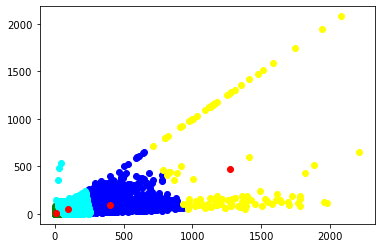

In [111]:
plt.scatter(dft1a[y1a_kmeans==0, 0], dft1a[y1a_kmeans==0, 1], c='green', label ='Cluster 1')
plt.scatter(dft1a[y1a_kmeans==1, 0], dft1a[y1a_kmeans==1, 1], c='blue', label ='Cluster 2')
plt.scatter(dft1a[y1a_kmeans==2, 0], dft1a[y1a_kmeans==2, 1], c='yellow', label ='Cluster 3')
plt.scatter(dft1a[y1a_kmeans==3, 0], dft1a[y1a_kmeans==3, 1], c='cyan', label ='Cluster 4')
plt.scatter(kmeans1a.cluster_centers_[:, 0], kmeans1a.cluster_centers_[:, 1], c='red', label = 'Centroids')

In [112]:
dft1b=dft1b.to_numpy()

In [113]:
kmeans1b= KMeans(n_clusters=4, n_jobs=-1, init='k-means++')
y1b_kmeans = kmeans1b.fit_predict(dft1b)

C:\Users\AKG\Anaconda3\envs\Ram\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


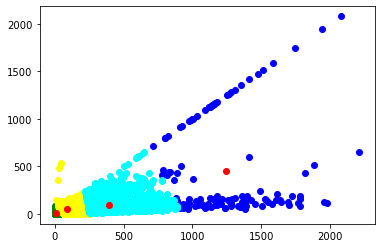

In [114]:
plt.scatter(dft1b[y1b_kmeans==0, 0], dft1b[y1b_kmeans==0, 1], c='green', label ='Cluster 1')
plt.scatter(dft1b[y1b_kmeans==1, 0], dft1b[y1b_kmeans==1, 1], c='blue', label ='Cluster 2')
plt.scatter(dft1b[y1b_kmeans==2, 0], dft1b[y1b_kmeans==2, 1], c='yellow', label ='Cluster 3')
plt.scatter(dft1b[y1b_kmeans==3, 0], dft1b[y1b_kmeans==3, 1], c='cyan', label ='Cluster 4')
plt.scatter(kmeans1b.cluster_centers_[:, 0], kmeans1b.cluster_centers_[:, 1], c='red', label = 'Centroids')

# T=30 Clustering

In [132]:
dft30=pd.concat([df1,df])

In [133]:
len(dft30)

980649

In [134]:
dft30=dft30.groupby(dft30.index//30).sum()

In [135]:
len(dft30)

16684

In [136]:
dft30['Uplink/Downlink Ratio']=dft30['UplinkCount']/dft30['DownlinkCount']

In [137]:
dft30=dft30.replace([np.inf, -np.inf], np.nan)

In [138]:
dft30=dft30.dropna()

In [139]:
len(dft30)

9251

In [140]:
dft30a=dft30[['UplinkCount','DownlinkCount']]
dft30b=dft30[['UplinkCount','DownlinkCount','Uplink/Downlink Ratio']]

In [141]:
dft30a=dft30a.to_numpy()

In [142]:
kmeans30a= KMeans(n_clusters=4, n_jobs=-1, init='k-means++')
y30a_kmeans = kmeans30a.fit_predict(dft30a)

C:\Users\AKG\Anaconda3\envs\Ram\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


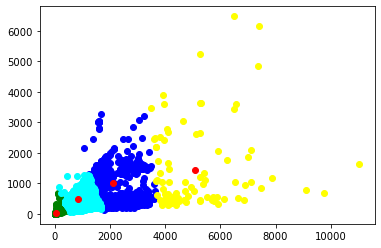

In [143]:
plt.scatter(dft30a[y30a_kmeans==0, 0], dft30a[y30a_kmeans==0, 1], c='green', label ='Cluster 1')
plt.scatter(dft30a[y30a_kmeans==1, 0], dft30a[y30a_kmeans==1, 1], c='blue', label ='Cluster 2')
plt.scatter(dft30a[y30a_kmeans==2, 0], dft30a[y30a_kmeans==2, 1], c='yellow', label ='Cluster 3')
plt.scatter(dft30a[y30a_kmeans==3, 0], dft30a[y30a_kmeans==3, 1], c='cyan', label ='Cluster 4')
plt.scatter(kmeans30a.cluster_centers_[:, 0], kmeans30a.cluster_centers_[:, 1], c='red', label = 'Centroids')

In [144]:
dft30b=dft30b.to_numpy()

In [145]:
kmeans30b= KMeans(n_clusters=4, n_jobs=-1, init='k-means++')
y30b_kmeans = kmeans30b.fit_predict(dft30b)

C:\Users\AKG\Anaconda3\envs\Ram\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


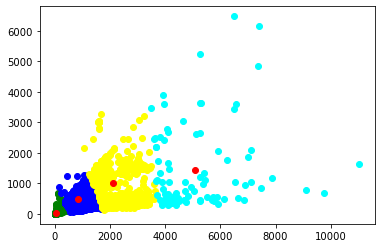

In [146]:
plt.scatter(dft30b[y30b_kmeans==0, 0], dft30b[y30b_kmeans==0, 1], c='green', label ='Cluster 1')
plt.scatter(dft30b[y30b_kmeans==1, 0], dft30b[y30b_kmeans==1, 1], c='blue', label ='Cluster 2')
plt.scatter(dft30b[y30b_kmeans==2, 0], dft30b[y30b_kmeans==2, 1], c='yellow', label ='Cluster 3')
plt.scatter(dft30b[y30b_kmeans==3, 0], dft30b[y30b_kmeans==3, 1], c='cyan', label ='Cluster 4')
plt.scatter(kmeans30b.cluster_centers_[:, 0], kmeans30b.cluster_centers_[:, 1], c='red', label = 'Centroids')

# T=60 Clustering

In [147]:
dft60=pd.concat([df1,df])

In [148]:
len(dft60)

980649

In [149]:
dft60=dft60.groupby(dft60.index//60).sum()

In [150]:
len(dft60)

8342

In [151]:
dft60['Uplink/Downlink Ratio']=dft60['UplinkCount']/dft60['DownlinkCount']

In [152]:
dft60=dft60.replace([np.inf, -np.inf], np.nan)

In [153]:
dft60=dft60.dropna()

In [154]:
len(dft60)

6053

In [155]:
dft60a=dft60[['UplinkCount','DownlinkCount']]
dft60b=dft60[['UplinkCount','DownlinkCount','Uplink/Downlink Ratio']]

In [158]:
dft60a=dft60a.to_numpy()

In [159]:
kmeans60a= KMeans(n_clusters=4, n_jobs=-1, init='k-means++')
y60a_kmeans = kmeans60a.fit_predict(dft60a)

C:\Users\AKG\Anaconda3\envs\Ram\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


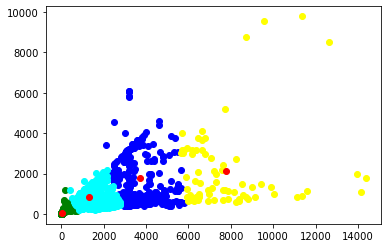

In [160]:
plt.scatter(dft60a[y60a_kmeans==0, 0], dft60a[y60a_kmeans==0, 1], c='green', label ='Cluster 1')
plt.scatter(dft60a[y60a_kmeans==1, 0], dft60a[y60a_kmeans==1, 1], c='blue', label ='Cluster 2')
plt.scatter(dft60a[y60a_kmeans==2, 0], dft60a[y60a_kmeans==2, 1], c='yellow', label ='Cluster 3')
plt.scatter(dft60a[y60a_kmeans==3, 0], dft60a[y60a_kmeans==3, 1], c='cyan', label ='Cluster 4')
plt.scatter(kmeans60a.cluster_centers_[:, 0], kmeans60a.cluster_centers_[:, 1], c='red', label = 'Centroids')

In [162]:
dft60b=dft60b.to_numpy()

In [163]:
kmeans60b= KMeans(n_clusters=4, n_jobs=-1, init='k-means++')
y60b_kmeans = kmeans60b.fit_predict(dft60b)

C:\Users\AKG\Anaconda3\envs\Ram\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


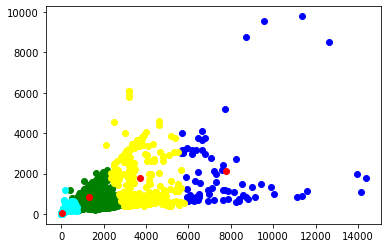

In [164]:
plt.scatter(dft60b[y60b_kmeans==0, 0], dft60b[y60b_kmeans==0, 1], c='green', label ='Cluster 1')
plt.scatter(dft60b[y60b_kmeans==1, 0], dft60b[y60b_kmeans==1, 1], c='blue', label ='Cluster 2')
plt.scatter(dft60b[y60b_kmeans==2, 0], dft60b[y60b_kmeans==2, 1], c='yellow', label ='Cluster 3')
plt.scatter(dft60b[y60b_kmeans==3, 0], dft60b[y60b_kmeans==3, 1], c='cyan', label ='Cluster 4')
plt.scatter(kmeans60b.cluster_centers_[:, 0], kmeans60b.cluster_centers_[:, 1], c='red', label = 'Centroids')